In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [ ]:
def get_magnitude_spectrum(img):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))
  plt.subplot(1,2,1),plt.imshow(img,cmap='gray')
  plt.title('Input Image'),plt.xticks([]),plt.yticks([])
  plt.subplot(1,2,2),plt.imshow(magnitude_spectrum,cmap='gray')
  plt.title('Magnitude Spectrum'),plt.xticks([]),plt.yticks([])
  plt.show()

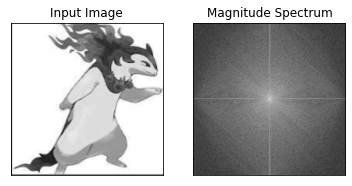

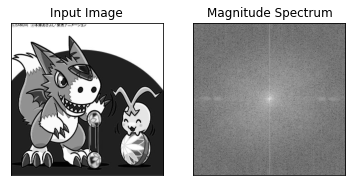

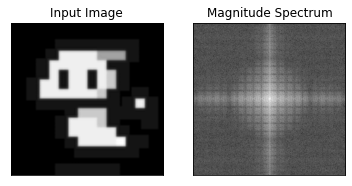

In [ ]:
img1 = cv.cvtColor(cv.imread('typhlosion.png'),cv.COLOR_RGB2GRAY)
img2 = cv.cvtColor(cv.imread("DORU&TokoX.jpg"),cv.COLOR_RGB2GRAY)
img3 = cv.cvtColor(cv.imread('dragaonenem.png'),cv.COLOR_RGB2GRAY)
img1 = cv.resize(img1,(300,300))
img2 = cv.resize(img2,(300,300))
img3 = cv.resize(img3,(300,300))
get_magnitude_spectrum(img1)
get_magnitude_spectrum(img2)
get_magnitude_spectrum(img3)

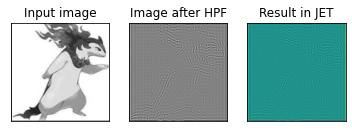

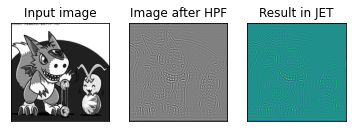

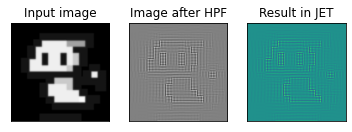

In [ ]:
def jet(img:np.ndarray):
  f = np.fft.fft2(img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift))
  rows,cols = img.shape
  crow,ccol = rows//2,cols//2
  fshift[crow-30:crow+31,ccol-30:ccol+31] = 0
  f_ishift = np.fft.ifftshift(fshift)
  img_back = np.fft.fft2(f_ishift)
  img_back = np.real(img_back)
  RM = cv.getRotationMatrix2D((crow,ccol),180,1.0)
  img_back = cv.warpAffine(img_back,RM,(cols,rows))
  plt.subplot(131),plt.imshow(img,cmap='gray')
  plt.title("Input image"),plt.xticks([]),plt.yticks([])
  plt.subplot(132),plt.imshow(img_back,cmap='gray')
  plt.title("Image after HPF"),plt.xticks([]),plt.yticks([])
  plt.subplot(133),plt.imshow(img_back)
  plt.title("Result in JET"),plt.xticks([]),plt.yticks([])
  plt.show()
jet(img1)
jet(img2)
jet(img3)

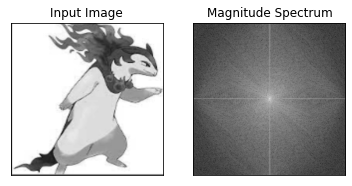

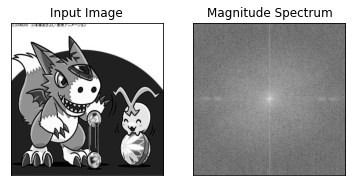

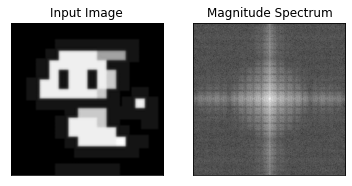

In [ ]:
def dft_magnitude_spectrum(img):
  dft = cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()
dft_magnitude_spectrum(img1)
dft_magnitude_spectrum(img2)
dft_magnitude_spectrum(img3)

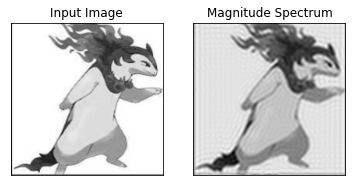

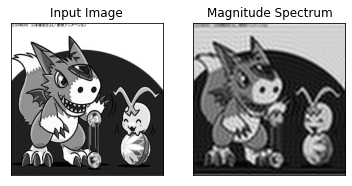

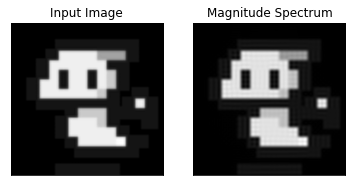

In [ ]:
from numpy.core.fromnumeric import shape
def cvidft(img):
  rows,cols = img.shape
  crow,ccol = rows//2,cols//2
  mask = np.zeros((rows,cols,2),np.uint8)
  mask[crow-30:crow+30,ccol-30:ccol+30] = 1
  dft = cv.dft(np.float32(img),flags=cv.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)
  fshift = dft_shift*mask
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv.idft(f_ishift)
  img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
  plt.subplot(121),plt.imshow(img, cmap = 'gray')
  plt.title('Input Image'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
  plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
  plt.show()
cvidft(img1)
cvidft(img2)
cvidft(img3)

In [ ]:
def optimizationdft(img):
  rows,cols = img.shape
  nrows = cv.getOptimalDFTSize(rows)
  ncols = cv.getOptimalDFTSize(cols)
  right = ncols - cols
  bottom = nrows - rows
  bordertype = cv.BORDER_CONSTANT
  nimg = cv.copyMakeBorder(img,0,bottom,0,right,bordertype, value = 0)

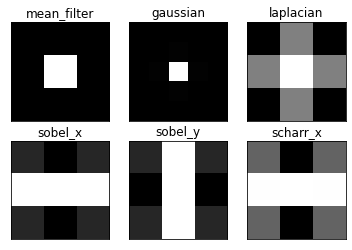

In [ ]:
mean_filter = np.ones((3,3),dtype=np.uint8)
# creating a gaussian filter
x = cv.getGaussianKernel(5,10)
gaussian = x*x.T
# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]],dtype=np.uint8)
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]],dtype=np.uint8)
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]],dtype=np.uint8)
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]],dtype=np.uint8)
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()

INFO Blurry (21.4418)
(235, 235, 3)


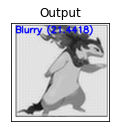

INFO Blurry (20.0375)
(235, 235, 3)


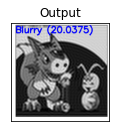

INFO Blurry (14.8777)
(235, 235, 3)


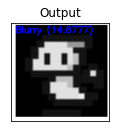

In [ ]:
#Blur detection
def detect_blurr_fft(img,size=60,thresh=10,vis=False):
  (h,w) = img.shape
  (cX,cY) = (w//2,h//2)
  fft = np.fft.fft2(img)
  fftShift = np.fft.fftshift(fft)
  if vis:
    magnitude = 20*np.log(np.abs(fftShift))
    (fig,ax) = plt.subplots(1,2,)
    ax[0].imshow(img,cmap='gray')
    ax[0].set_title("Input")
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].imshow(magnitude,cmap='gray')
    ax[1].set_title("Magnitude Spectrum")
    ax[1].set_xticks([])
    ax[1].set_yticks([])
    plt.show()
  fftShift[cY - size:cY+size,cX-size:cX+size] = 0
  ifftShift = np.fft.ifftshift(fftShift)
  recon = np.fft.ifft2(ifftShift)
  magnitude = 20*np.log(np.abs(recon))
  mean = np.mean(magnitude)
  return (mean,mean<=thresh)
import imutils
for i in range(3):
  gray = cv.imread(f"blur_img{i}.png")
  gray = cv.cvtColor(gray,cv.COLOR_RGB2GRAY)
  mean,blurry = detect_blurr_fft(gray,size=90,thresh=25)
  image = np.dstack([gray]*3)
  color = (0,0,255) if blurry else (0,255,0)
  text = "Blurry ({:.4f})" if blurry else "Not blurry ({:.4f})"
  text = text.format(mean)
  cv.putText(image,text,(10,25),cv.FONT_HERSHEY_SIMPLEX,0.7,color,2)
  print("INFO {}".format(text))
  print(image.shape)
  plt.subplot(1,3,i+1)
  plt.imshow(image)
  plt.title('Output')
  plt.xticks([]),plt.yticks([])
  plt.show()

[INFO] Kernel: 1, Result: Not Blurry (13.5710)


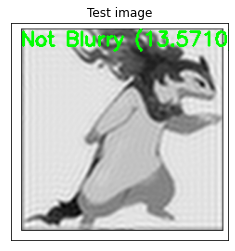

[INFO] Kernel: 3, Result: Blurry (-0.7491)


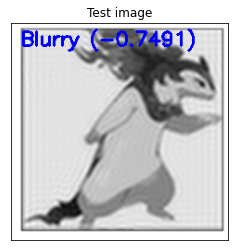

[INFO] Kernel: 5, Result: Blurry (-13.1261)


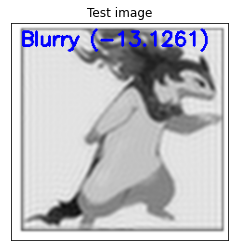

[INFO] Kernel: 7, Result: Blurry (-31.3468)


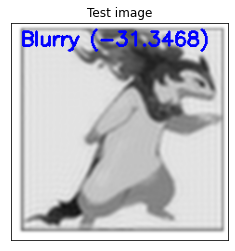

[INFO] Kernel: 9, Result: Blurry (-36.3052)


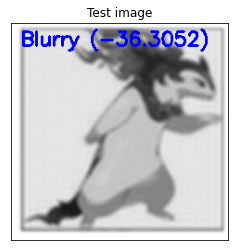

[INFO] Kernel: 11, Result: Blurry (-40.0416)


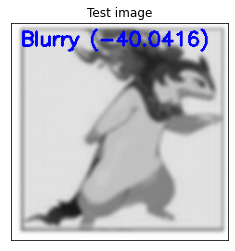

[INFO] Kernel: 13, Result: Blurry (-41.2520)


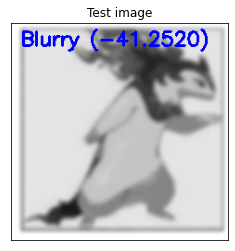

[INFO] Kernel: 15, Result: Blurry (-44.5200)


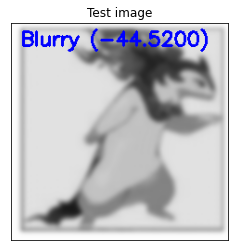

[INFO] Kernel: 17, Result: Blurry (-42.4699)


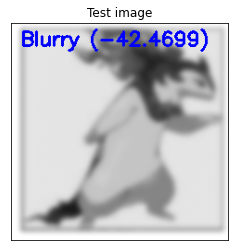

[INFO] Kernel: 19, Result: Blurry (-39.4635)


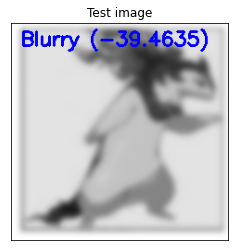

[INFO] Kernel: 21, Result: Blurry (-37.9183)


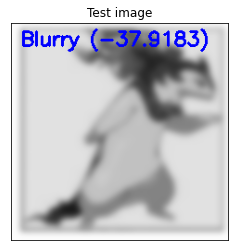

[INFO] Kernel: 23, Result: Blurry (-35.3427)


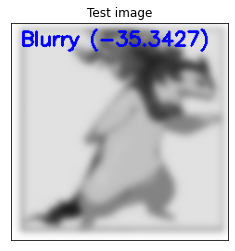

[INFO] Kernel: 25, Result: Blurry (-36.7980)


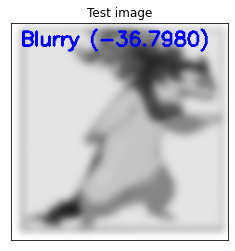

[INFO] Kernel: 27, Result: Blurry (-34.4745)


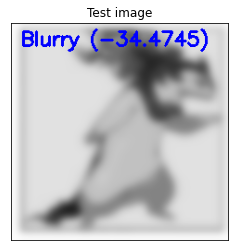

[INFO] Kernel: 29, Result: Blurry (-33.7549)


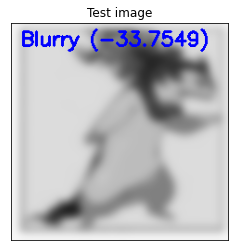

[INFO] Kernel: 1, Result: Not Blurry (15.8636)


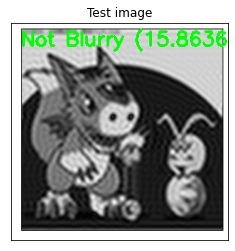

[INFO] Kernel: 3, Result: Blurry (0.8771)


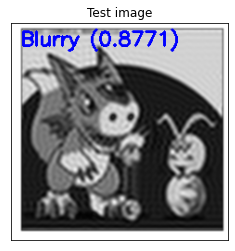

[INFO] Kernel: 5, Result: Blurry (-12.1522)


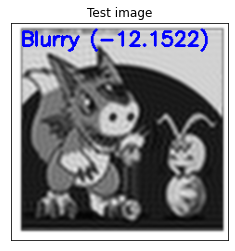

[INFO] Kernel: 7, Result: Blurry (-31.0222)


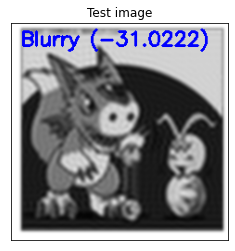

[INFO] Kernel: 9, Result: Blurry (-35.9779)


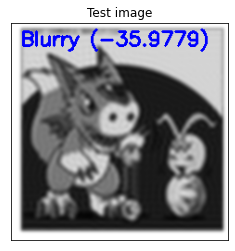

[INFO] Kernel: 11, Result: Blurry (-39.1893)


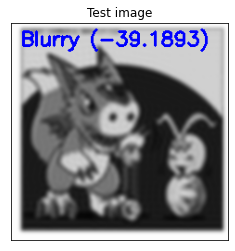

[INFO] Kernel: 13, Result: Blurry (-40.5612)


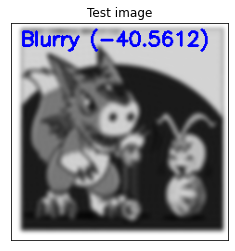

[INFO] Kernel: 15, Result: Blurry (-39.3580)


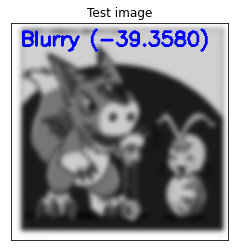

[INFO] Kernel: 17, Result: Blurry (-40.9330)


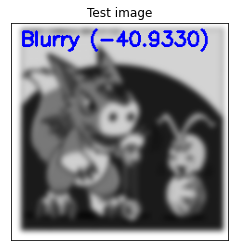

[INFO] Kernel: 19, Result: Blurry (-35.6627)


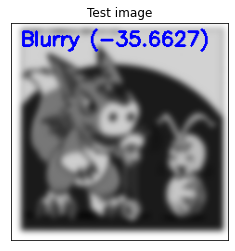

[INFO] Kernel: 21, Result: Blurry (-33.7611)


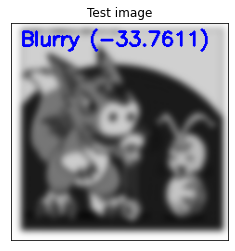

[INFO] Kernel: 23, Result: Blurry (-31.7193)


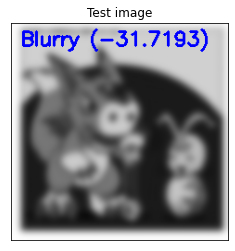

[INFO] Kernel: 25, Result: Blurry (-30.8222)


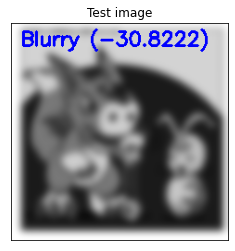

[INFO] Kernel: 27, Result: Blurry (-29.7246)


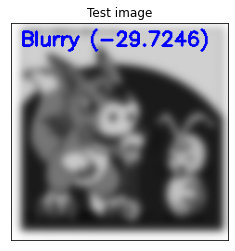

[INFO] Kernel: 29, Result: Blurry (-29.2024)


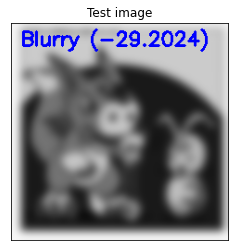

[INFO] Kernel: 1, Result: Not Blurry (20.6670)


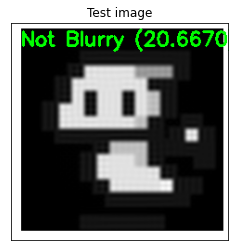

[INFO] Kernel: 3, Result: Blurry (4.7569)


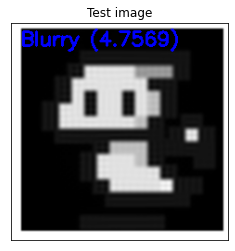

[INFO] Kernel: 5, Result: Blurry (-9.8093)


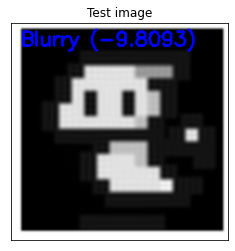

[INFO] Kernel: 7, Result: Blurry (-33.4479)


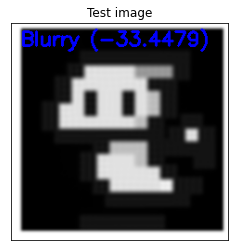

[INFO] Kernel: 9, Result: Blurry (-40.0683)


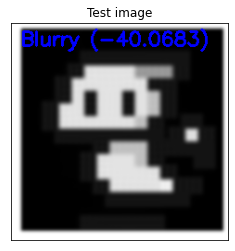

[INFO] Kernel: 11, Result: Blurry (-47.2012)


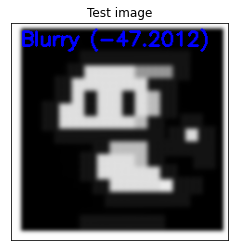

[INFO] Kernel: 13, Result: Blurry (-49.9155)


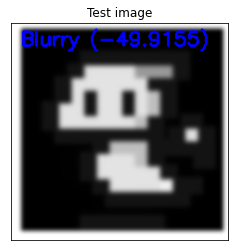

[INFO] Kernel: 15, Result: Blurry (-44.1380)


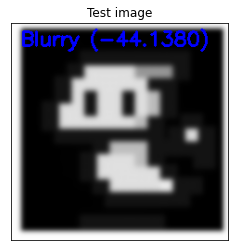

[INFO] Kernel: 17, Result: Blurry (-43.1642)


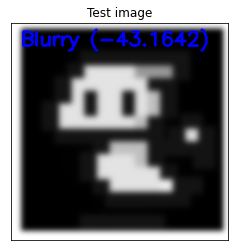

[INFO] Kernel: 19, Result: Blurry (-35.9230)


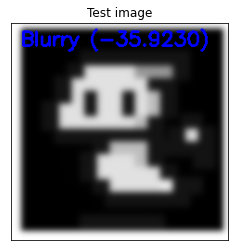

[INFO] Kernel: 21, Result: Blurry (-33.0853)


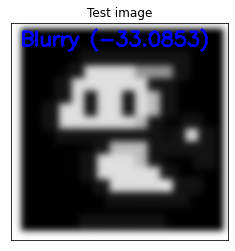

[INFO] Kernel: 23, Result: Blurry (-28.3532)


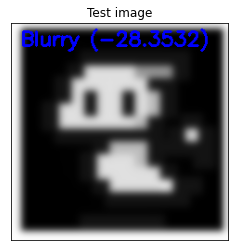

[INFO] Kernel: 25, Result: Blurry (-25.9502)


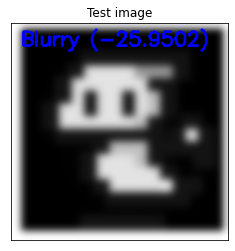

[INFO] Kernel: 27, Result: Blurry (-24.1132)


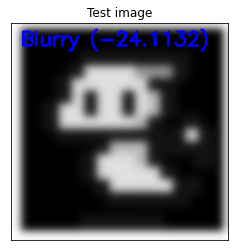

[INFO] Kernel: 29, Result: Blurry (-23.5211)


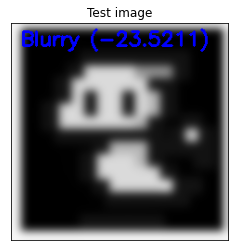

In [ ]:
#test
for i in range(3):
  gray = cv.imread(f"blur_img{i}.png")
  gray = cv.cvtColor(gray,cv.COLOR_RGB2GRAY)
  for radius in range(1,30,2):
    img = gray.copy()
    if radius>0:
      image = cv.GaussianBlur(img,(radius,radius),0)
      mean,blurry = detect_blurr_fft(image)
      image = np.dstack([image] * 3)
      color = (0, 0, 255) if blurry else (0, 255, 0)
      text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
      text = text.format(mean)
      cv.putText(image, text, (10, 25), cv.FONT_HERSHEY_SIMPLEX,0.7, color, 2)
      print("[INFO] Kernel: {}, Result: {}".format(radius, text))
    plt.imshow(image),plt.xticks([]),plt.yticks([]),plt.title("Test image")
    plt.show()